In [1]:
##The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.

##Dataset: cars-dataset.csvView in a new window

##Attribute Information:

##Car Name – Name of the car

##Cyl – No of cylinders in the car – Multivalued discrete

##Disp – Displacement – continuous

##Hp – Horsepower – continuous

##Wt – Weight – continuous

##Acc – Accleration – continuous

##Yr – Model of the car – Multivalued discrete

In [2]:
###EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics

In [4]:
car_df=pd.DataFrame()
car_df=pd.read_csv('cars-dataset.csv').rename(columns=lambda x : x.strip())

In [5]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
car_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [8]:
car_df.shape

(398, 8)

In [9]:
print("Find hp column missing in the describe. On observing , we see that some values in this column are ?. Will replace them with NaN")

Find hp column missing in the describe. On observing , we see that some values in this column are ?. Will replace them with NaN


In [10]:
car_df['hp']=car_df['hp'].replace({'?':None})

In [11]:
#Let us see if we can get those records with nan

car_df[car_df.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,None,2046,19.0,71,25.0
126,ford maverick,6,200.0,None,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,None,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,None,2905,14.3,80,23.6
354,renault 18i,4,100.0,None,2320,15.8,81,34.5
374,amc concord dl,4,151.0,None,3035,20.5,82,23.0


In [12]:
car_df=car_df.dropna()

In [13]:
car_df.shape

(392, 8)

In [14]:
print("hp is of type object. Converting to float type")
car_df['hp']=car_df['hp'].astype('float64')
car_df.info()

hp is of type object. Converting to float type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [15]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


In [16]:
print("Observing differences in mean and median of cyl,disp, hp and wt")

Observing differences in mean and median of cyl,disp, hp and wt


In [17]:
car_df=car_df.drop('car name',axis=1)

In [18]:
car_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [19]:
#creating derived column age from yr
car_df['age']=car_df['yr'].max()-car_df['yr']

In [20]:
car_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,age
0,8,307.0,130.0,3504,12.0,70,18.0,12
1,8,350.0,165.0,3693,11.5,70,15.0,12
2,8,318.0,150.0,3436,11.0,70,18.0,12
3,8,304.0,150.0,3433,12.0,70,16.0,12
4,8,302.0,140.0,3449,10.5,70,17.0,12


In [21]:
car_df.drop('yr',axis=1,inplace=True)

In [22]:
##Use pair plot or scatter matrix to visualize how the different variables are related
##(Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters 
##existing in the dataset) – 5 points

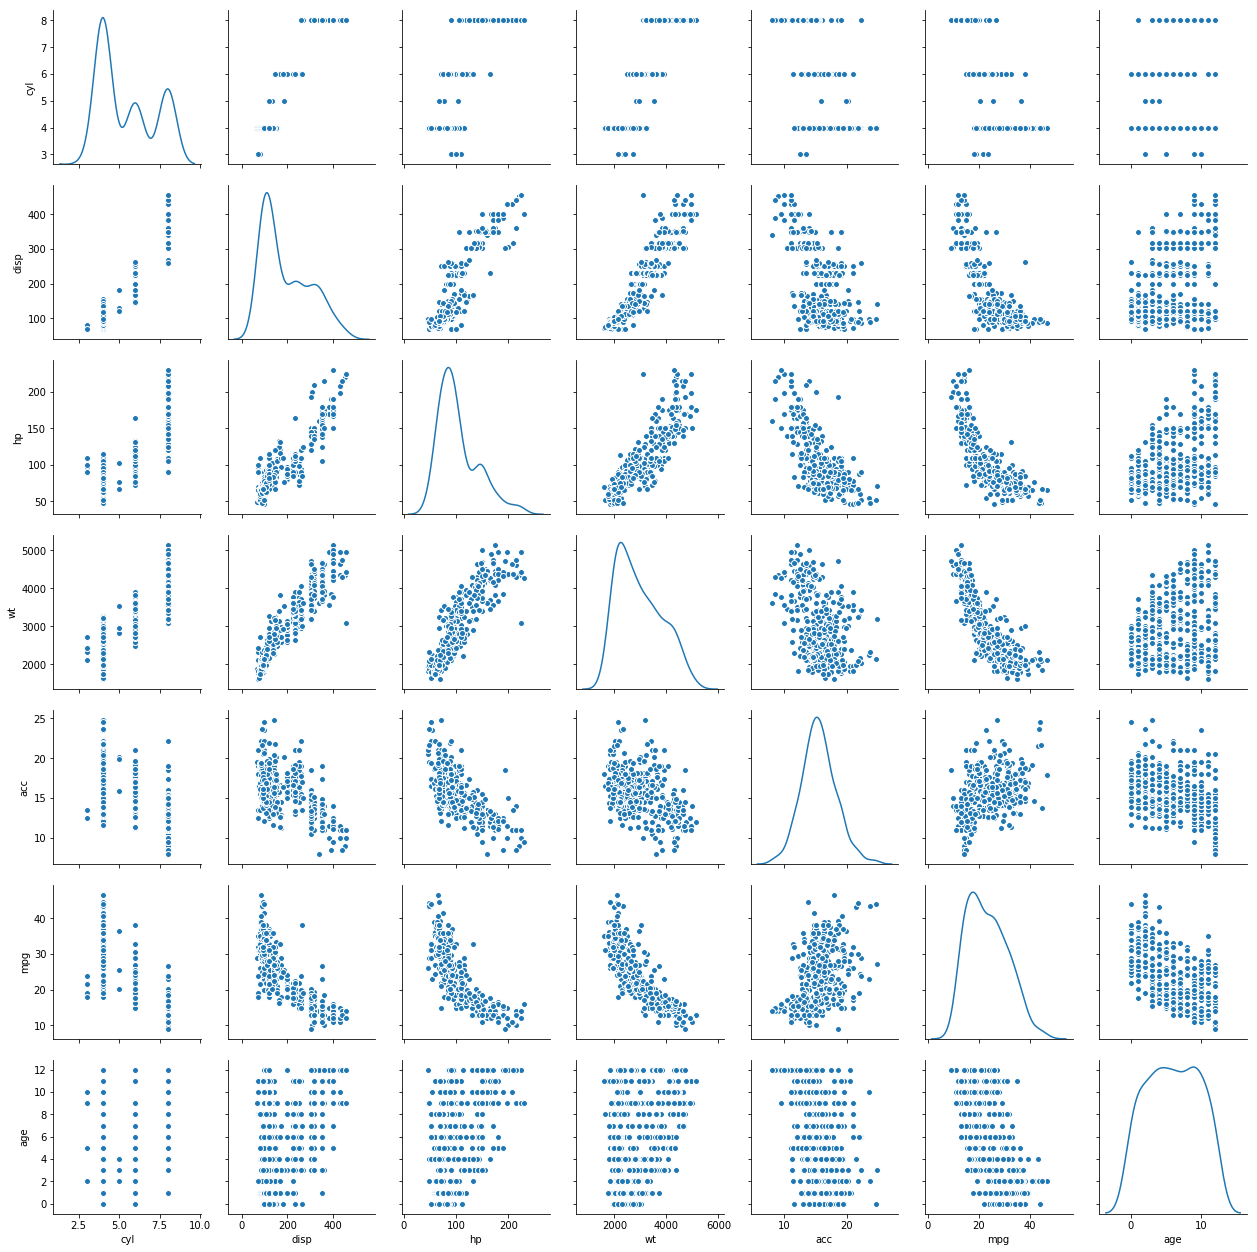

In [23]:
sns.pairplot(car_df,diag_kind='kde')

In [24]:
print("Looking at the diagonal line in the pairplot, we can see that there should be a minimum of 3 clusters as observed in the cyl  ")

print("Number of cluster could be in the range 3-5. Need to see elbow curve to verify that")

In [25]:
##Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. 
##Identify and separate the clusters (15 points)

In [26]:
from sklearn.cluster import KMeans

Looking at the diagonal line in the pairplot, we can see that there should be a minimum of 3 clusters as observed in the cyl  
Number of cluster could be in the range 3-5. Need to see elbow curve to verify that


In [27]:
from scipy.stats import zscore

car_df_z = car_df.apply(zscore)

In [28]:
#Removing outliers based on 2.5 z-score
car_df_z=car_df_z[(np.abs(car_df_z) < 2.5).all(axis=1)]
car_df_z.shape

(371, 7)

In [29]:
cluster_range = range( 2, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10)
  clusters.fit(car_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(car_df_z, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df

,num_clusters,cluster_errors,Avg Sil Score
0,2,1087.702209,0.434814
1,3,789.111529,0.361379
2,4,601.351938,0.357964
3,5,540.981615,0.324011
4,6,492.222864,0.304813
5,7,446.772105,0.271989


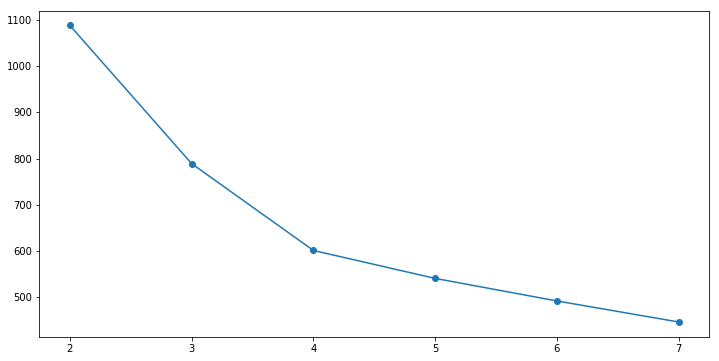

In [30]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [31]:
print("From the above elbow plot, we can consider 4 or 5 as the number of clusters. Will start analysis with K value as 5 ")

From the above elbow plot, we can consider 4 or 5 as the number of clusters. Will start analysis with K value as 5 


In [32]:
def cluster_KMEANS(n) :
    cluster = KMeans( n_clusters = n, random_state = 1 )
    cluster.fit(car_df_z)
    centroids = cluster.cluster_centers_
    print(centroids)
    centroid_df = pd.DataFrame(centroids, columns = list(car_df_z) )
    print(centroid_df)
    prediction=cluster.predict(car_df_z)
    car_df_z['GROUP']=prediction

In [33]:
cluster_KMEANS(5)

[[-0.68258024 -0.5458627  -0.23545076 -0.40728981 -0.3152418   0.35307855
  -0.77650033]
 [ 1.46997107  1.37732792  1.30269467  1.33987657 -0.93010387 -1.11663895
   0.52513032]
 [-0.82488088 -0.85706257 -0.85607824 -0.89180054  0.461651    1.31101411
  -1.13265434]
 [ 0.39067788  0.32114503 -0.11236107  0.36381187  0.45000695 -0.54629806
   0.11676754]
 [-0.87926005 -0.86441658 -0.63078372 -0.86044909  0.41156334  0.26517723
   0.8134141 ]]
        cyl      disp        hp        wt       acc       mpg       age
0 -0.682580 -0.545863 -0.235451 -0.407290 -0.315242  0.353079 -0.776500
1  1.469971  1.377328  1.302695  1.339877 -0.930104 -1.116639  0.525130
2 -0.824881 -0.857063 -0.856078 -0.891801  0.461651  1.311014 -1.132654
3  0.390678  0.321145 -0.112361  0.363812  0.450007 -0.546298  0.116768
4 -0.879260 -0.864417 -0.630784 -0.860449  0.411563  0.265177  0.813414


In [34]:
car_df_z.head()

,cyl,disp,hp,wt,acc,mpg,age,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.698638,1.625315,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.083498,1.625315,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.698638,1.625315,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.955212,1.625315,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.826925,1.625315,1


In [35]:
car_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,mpg,age
GROUP,,,,,,,
0,55,55,55,55,55,55,55
1,84,84,84,84,84,84,84
2,75,75,75,75,75,75,75
3,80,80,80,80,80,80,80
4,77,77,77,77,77,77,77


In [36]:
print("Observing class imbalance in the distribution of group counts")

Observing class imbalance in the distribution of group counts


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFD9DA0>,
      dtype=object)

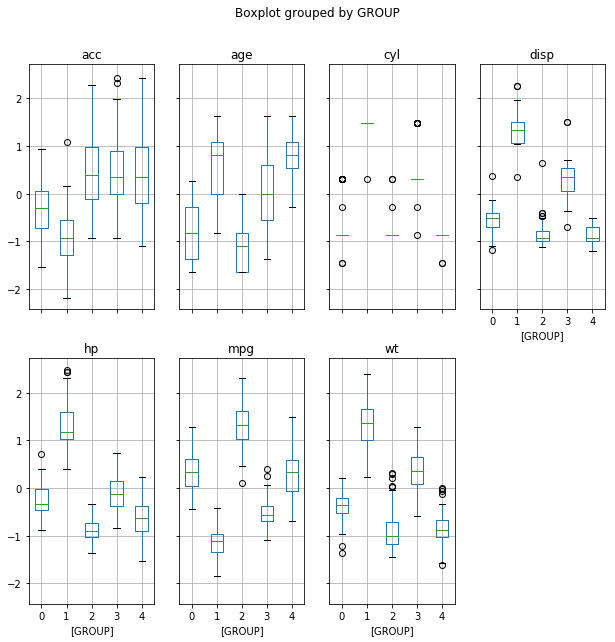

In [37]:
car_df_z.boxplot(by='GROUP', layout=(2,4), figsize=(10, 10))

In [38]:
#print("We see clear clusters only in mpg box plots. Rest all the features are showing overlapping clusters ")
print("Unable to see clear clusters")
print("Looks like older vehicles are giving less mileage as compared to the newer vehicles,although group 4 seems contradictory")
print("Lesser number of cylinders in cars provide better mileage")
print("Lighter cars (less wt group) provides better mileage")
print("Horsepower has an inverse relation with mileage")
print("disp and mpg also show inverse relation")
print("Will try with 3 clusters now")

Unable to see clear clusters
Looks like older vehicles are giving less mileage as compared to the newer vehicles,although group 4 seems contradictory
Lesser number of cylinders in cars provide better mileage
Lighter cars (less wt group) provides better mileage
Horsepower has an inverse relation with mileage
disp and mpg also show inverse relation
Will try with 3 clusters now


In [39]:
cluster_KMEANS(4)

[[-0.87926005 -0.86441658 -0.63078372 -0.86044909  0.41156334  0.26517723
   0.8134141   4.        ]
 [-0.76467676 -0.72540109 -0.59350508 -0.68681523  0.13296558  0.90573368
  -0.98197379  1.15384615]
 [ 1.46997107  1.37732792  1.30269467  1.33987657 -0.93010387 -1.11663895
   0.52513032  1.        ]
 [ 0.39067788  0.32114503 -0.11236107  0.36381187  0.45000695 -0.54629806
   0.11676754  3.        ]]
        cyl      disp        hp        wt       acc       mpg       age  \
0 -0.879260 -0.864417 -0.630784 -0.860449  0.411563  0.265177  0.813414   
1 -0.764677 -0.725401 -0.593505 -0.686815  0.132966  0.905734 -0.981974   
2  1.469971  1.377328  1.302695  1.339877 -0.930104 -1.116639  0.525130   
3  0.390678  0.321145 -0.112361  0.363812  0.450007 -0.546298  0.116768   

      GROUP  
0  4.000000  
1  1.153846  
2  1.000000  
3  3.000000  


In [40]:
car_df_z.head()

,cyl,disp,hp,wt,acc,mpg,age,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.698638,1.625315,2
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.083498,1.625315,2
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.698638,1.625315,2
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.955212,1.625315,2
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.826925,1.625315,2


In [41]:
car_df_z.groupby('GROUP').count()

,cyl,disp,hp,wt,acc,mpg,age
GROUP,,,,,,,
0,77,77,77,77,77,77,77
1,130,130,130,130,130,130,130
2,84,84,84,84,84,84,84
3,80,80,80,80,80,80,80


In [42]:
print("Observing fairly even distribution here wrt to the count")

Observing fairly even distribution here wrt to the count


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F9CC828>,
      dtype=object)

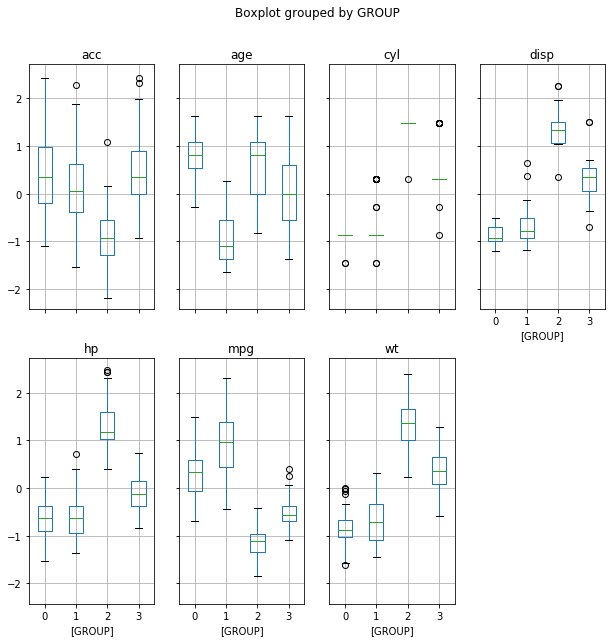

In [43]:
car_df_z.boxplot(by='GROUP', layout=(2,4), figsize=(10, 10))

In [44]:
print("Observing clear clusters wrt to mpg feature. Rest of the features show overlaps in clusters")
print("acc doesn't seem to show any steady impact on the mpg ")
print("age seems to impact mpg inversely. Newer cars should ideally give higher mileage.")
print("But group 2 and 3 are cars of same age group providing different mileages. Could be attributed to different cylinders,hp and wt.")
print("Group 3 has more cylinders and higher hp and wt which brings down mpg whereas group 2 has less cylinders and less hp and wt which increases it's mileage ")

Observing clear clusters wrt to mpg feature. Rest of the features show overlaps in clusters
acc doesn't seem to show any steady impact on the mpg 
age seems to impact mpg inversely. Newer cars should ideally give higher mileage.
But group 2 and 3 are cars of same age group providing different mileages. Could be attributed to different cylinders,hp and wt.
Group 3 has more cylinders and higher hp and wt which brings down mpg whereas group 2 has less cylinders and less hp and wt which increases it's mileage 


In [48]:
#Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [47]:
car_df_0=car_df_z.loc[car_df_z['GROUP']==0]
car_df_1=car_df_z.loc[car_df_z['GROUP']==1]
car_df_2=car_df_z.loc[car_df_z['GROUP']==2]
car_df_3=car_df_z.loc[car_df_z['GROUP']==3]

In [50]:
print(car_df_0.shape,car_df_1.shape,car_df_2.shape,car_df_3.shape)

(77, 8) (130, 8) (84, 8) (80, 8)


In [52]:
car_df_0.drop('GROUP',axis=1,inplace=True)
car_df_1.drop('GROUP',axis=1,inplace=True)
car_df_2.drop('GROUP',axis=1,inplace=True)
car_df_3.drop('GROUP',axis=1,inplace=True)

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
car_df_3.head()

,cyl,disp,hp,wt,acc,mpg,age
15,0.309967,0.034332,-0.246329,-0.170436,-0.014999,-0.185492,1.625315
16,0.309967,0.043900,-0.194303,-0.239986,-0.014999,-0.698638,1.625315
17,0.309967,0.053468,-0.506461,-0.460422,0.166467,-0.313779,1.625315
24,0.309967,0.043900,-0.376395,-0.388515,-0.196464,-0.313779,1.625315
33,0.309967,0.359658,-0.116263,-0.405018,-0.922327,-0.570352,1.353505


In [58]:
car_df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,77.0,-0.879260,0.093978,-1.451004,-0.864014,-0.864014,-0.864014,-0.864014
disp,77.0,-0.864417,0.183186,-1.209563,-0.989490,-0.922511,-0.712005,-0.520637
hp,77.0,-0.630784,0.387947,-1.520975,-0.896659,-0.636527,-0.376395,0.221908
wt,77.0,-0.860449,0.337855,-1.608575,-1.034499,-0.885969,-0.679679,0.001669
acc,77.0,0.411563,0.805605,-1.103792,-0.196464,0.347933,0.964916,2.416641
mpg,77.0,0.265177,0.469049,-0.698638,-0.057205,0.327654,0.584228,1.482234
age,77.0,0.813414,0.497873,-0.277358,0.538074,0.809884,1.081695,1.625315


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [63]:
def create_linear_regression_model(df):
    # Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
    X = df.drop('mpg', axis=1)
    # Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
    y = df[['mpg']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
    lr_model=LinearRegression()
    lr_model.fit(X_train,y_train)
    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, lr_model.coef_[0][idx]))
    intercept = lr_model.intercept_[0]
    print("The intercept for our model is {}".format(intercept))
    print("training score",lr_model.score(X_train, y_train))
    print("test score",lr_model.score(X_test, y_test))

In [64]:
create_linear_regression_model(car_df_0)

The coefficient for cyl is 2.2719327478914075
The coefficient for disp is -0.9940824615611084
The coefficient for hp is 0.04759156588254987
The coefficient for wt is -0.6683872960655175
The coefficient for acc is -0.04315961689853143
The coefficient for age is -0.05939534158423475
The intercept for our model is 0.9251033310094555
training score 0.6861253674846652
test score 0.6799097913116423


In [65]:
create_linear_regression_model(car_df_1)

The coefficient for cyl is 0.29384496070793553
The coefficient for disp is -0.05265463756069233
The coefficient for hp is -0.7025462409387575
The coefficient for wt is -0.5562377798656238
The coefficient for acc is -0.015939777575420977
The coefficient for age is -0.38162135980634265
The intercept for our model is -0.12218646816885836
training score 0.6260627526857347
test score 0.6355244899801992


In [66]:
create_linear_regression_model(car_df_2)

The coefficient for cyl is -0.06905842697173022
The coefficient for disp is -0.13327100020735078
The coefficient for hp is -0.16596711163490752
The coefficient for wt is -0.02555930093713589
The coefficient for acc is -0.2321471671116307
The coefficient for age is -0.19226998920363192
The intercept for our model is -0.679650641957151
training score 0.5796525735081146
test score 0.44990201169550204


In [67]:
create_linear_regression_model(car_df_3)

The coefficient for cyl is 0.1595236494451113
The coefficient for disp is -0.021697156088846675
The coefficient for hp is -0.12279522763605624
The coefficient for wt is -0.35442824946275203
The coefficient for acc is -0.011153264693734849
The coefficient for age is -0.184280052623504
The intercept for our model is -0.48110270710413616
training score 0.29587760187503664
test score 0.25487727331272003


In [68]:
print("All models are giving very bad performances. Will try again with K as 3")

All models are giving very bad performances. Will try again with K as 3


In [69]:
cluster_KMEANS(3)

[[-0.80729953 -0.77711217 -0.60737201 -0.75140367  0.23659857  0.66745906
  -0.31412419  0.62801932]
 [ 0.39067788  0.32114503 -0.11236107  0.36381187  0.45000695 -0.54629806
   0.11676754  3.        ]
 [ 1.46997107  1.37732792  1.30269467  1.33987657 -0.93010387 -1.11663895
   0.52513032  2.        ]]
        cyl      disp        hp        wt       acc       mpg       age  \
0 -0.807300 -0.777112 -0.607372 -0.751404  0.236599  0.667459 -0.314124   
1  0.390678  0.321145 -0.112361  0.363812  0.450007 -0.546298  0.116768   
2  1.469971  1.377328  1.302695  1.339877 -0.930104 -1.116639  0.525130   

      GROUP  
0  0.628019  
1  3.000000  
2  2.000000  


In [70]:
car_df_z.head()

,cyl,disp,hp,wt,acc,mpg,age,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.698638,1.625315,2
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.083498,1.625315,2
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.698638,1.625315,2
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.955212,1.625315,2
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.826925,1.625315,2


In [71]:
car_df_z.groupby('GROUP').count()

,cyl,disp,hp,wt,acc,mpg,age
GROUP,,,,,,,
0,207,207,207,207,207,207,207
1,80,80,80,80,80,80,80
2,84,84,84,84,84,84,84


In [72]:
print("Still observing class imbalance")

Still observing class imbalance


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000067A8BE0>,
      dtype=object)

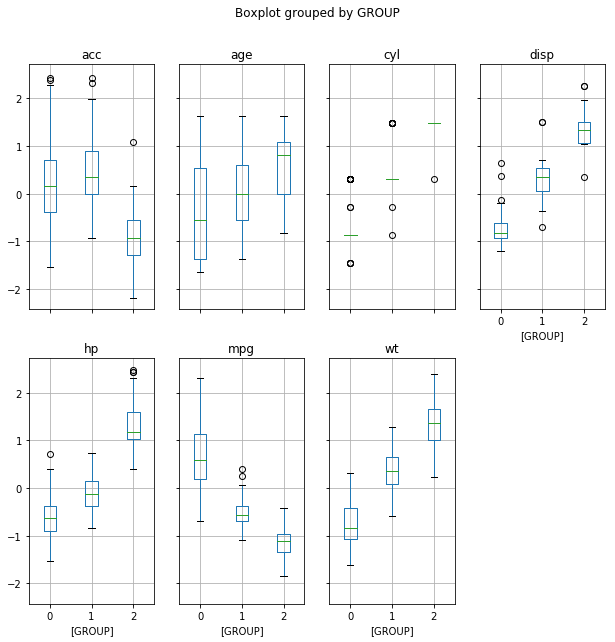

In [73]:
car_df_z.boxplot(by='GROUP', layout=(2,4), figsize=(10, 10))

In [74]:
print("Seeing fairly unique clusters from disp,hp,mpg and wt features perspective")
print("Can clearly see inverse relation of cyl,disp,wt and hp with mpg")

Seeing fairly unique clusters from disp,hp,mpg and wt features perspective
Can clearly see inverse relation of cyl,disp,wt and hp with mpg


In [75]:
car_df_0=car_df_z.loc[car_df_z['GROUP']==0]
car_df_1=car_df_z.loc[car_df_z['GROUP']==1]
car_df_2=car_df_z.loc[car_df_z['GROUP']==2]
#car_df_3=car_df_z.loc[car_df_z['GROUP']==3]

In [102]:
car_df_0.drop('GROUP',axis=1,inplace=True)
car_df_1.drop('GROUP',axis=1,inplace=True)
car_df_2.drop('GROUP',axis=1,inplace=True)

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
create_linear_regression_model(car_df_0)

The coefficient for cyl is 0.32515967249518485
The coefficient for disp is 0.11106997437194141
The coefficient for hp is -0.4053629670349478
The coefficient for wt is -0.743764536506415
The coefficient for acc is 0.020418471235091464
The coefficient for age is -0.3690105979760522
The intercept for our model is 0.10128525029043134
training score 0.686567572942553
test score 0.58804960053752


In [104]:
create_linear_regression_model(car_df_1)

The coefficient for cyl is 0.1595236494451113
The coefficient for disp is -0.021697156088846675
The coefficient for hp is -0.12279522763605624
The coefficient for wt is -0.35442824946275203
The coefficient for acc is -0.011153264693734849
The coefficient for age is -0.184280052623504
The intercept for our model is -0.48110270710413616
training score 0.29587760187503664
test score 0.25487727331272003


In [105]:
create_linear_regression_model(car_df_2)

The coefficient for cyl is -0.06905842697173022
The coefficient for disp is -0.13327100020735078
The coefficient for hp is -0.16596711163490752
The coefficient for wt is -0.02555930093713589
The coefficient for acc is -0.2321471671116307
The coefficient for age is -0.19226998920363192
The intercept for our model is -0.679650641957151
training score 0.5796525735081146
test score 0.44990201169550204


In [106]:
print("Still seeing very poor results of models")
print("Trying K-fold cross validation ")

Still seeing very poor results of models
Trying K-fold cross validation 


In [109]:
def create_linear_regression_model_with_k_fold(df):
    # Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
    X = df.drop('mpg', axis=1)
    # Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
    y = df[['mpg']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
    seed = 6
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    lr_model=LinearRegression()
    results = model_selection.cross_val_score(lr_model, X, y, scoring='mean_squared_error', cv=kfold)
    print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

In [110]:
create_linear_regression_model_with_k_fold(car_df_0)

Mean Square Error: 0.178 (0.086)


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [111]:
create_linear_regression_model_with_k_fold(car_df_1)

Mean Square Error: 0.099 (0.107)


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [112]:
create_linear_regression_model_with_k_fold(car_df_2)

Mean Square Error: 0.070 (0.064)


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [ ]:
print("Still seeing low performance. Below are my observations :")
print("Looks like the data set is missing some important features, those that might help in improving the model accuracy")
print("On further investigation, dataset itself seems faulty. On searching the pecifications of some cars, the values didn't add up ")
print("https://www.automobile-catalog.com/make/chevrolet_usa/chevelle_malibu_1gen/chevelle_malibu_1gen_2_hardtop_coupe_malibu/1970.html")
print("Above reference doesn't agree with the very 1st row of data")
print("Maybe we should go back and ")